# QuarentenaDados - Alura

### Aula 1 - Analisando dados de filmes. Dataset obtido em: https://grouplens.org/datasets/movielens/

Vamos importar a biblioteca pandas, um poderoso projeto open source para análise de manipulação de dados. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando pd.read_csv().

Estamos lendo um arquivo CSV (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o pd.read_excel() que lê arquivos xlsx entre diversos outros formatos, você pode encontrar mais informações na seção de input/output da documentação.

Depois de ler o dataset, nós trocamos os nomes das colunas pelos termos em português, logo em seguida utilizamos o método filmes.head() para visualizar as primeiras 5 linhas do nosso dataframe. Outra forma de visualizar as informações dos dados é utilizando o método filmes.sample(), se você tentar, vai verificar que ele retorna uma linha aleatória do seus dados. Para escolher aleatoriamente mais de 1 linha, por exemplo 5, é só passar esse valor desejado como parâmetro (filmes.sample(5)).

In [1]:
import pandas as pd

In [2]:
#Lendo csv de filmes
filmes = pd.read_csv(r"C:\Users\LemosM02\Desktop\Estudos\Quarentenadados\ml-latest-small\movies.csv")

In [3]:
#Renomeando colunas
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [100]:
filmes.shape

(9742, 3)

Há pouco falamos para consultar a documentação para obter mais informações, mas será que é realmente preciso sair do notebook para tirar algumas dúvidas mais simples?
Os notebooks facilitam a nossa vida podendo consultar o docstring das funções e métodos, rodando a célula com um ? na frente da chamada, uma view é aberta com as informações resumidas. Veja a seguir alguns exemplos:

In [99]:
# lendo a documentação de um método/atributo

?filmes.head

In [5]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
filmeId    9742 non-null int64
titulo     9742 non-null object
generos    9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [77]:
#Lendo csv de avaliações
avaliacoes = pd.read_csv(r"C:\Users\LemosM02\Desktop\Estudos\Quarentenadados\ml-latest-small\ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


A base de dados que usamos até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações.

Agora vamos analisar um pouco melhor o dataset de avaliações.

In [78]:
avaliacoes.shape

(100836, 4)

In [79]:
#Alterando o nome das colunas
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "dataregistro"]
avaliacoes.head()

,usuarioId,filmeId,nota,dataregistro
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Uma forma para "separar" as informações apenas do filmeId 1 é chamando o método avaliacaoes.query("filmeId==1"), esse método retornará apenas as linhas para quais a expressão booleana, "filmeId==1", for verdadeira.

Tendo as informações do filmeId 1 podemos chamar o avaliacoes_do_filme_1.describe(), para analisar as estatítiscas gerais dos dados.

In [9]:
#Analisando o filme 1
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,dataregistro
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [10]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,dataregistro
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das avaliações do filmeId 1:

In [101]:
avaliacoes_do_filme_1.mean()

usuarioId       3.065302e+02
filmeId         1.000000e+00
nota            3.920930e+00
dataregistro    1.129835e+09
dtype: float64

Calculamos as estatísicas apenas para o filmeId 1, mas também podemos chamar o método .describe() para a base completa (avaliacões).

In [11]:
avaliacoes.describe()

,usuarioId,filmeId,nota,dataregistro
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Ok, nós calculamos um tanto de coisa usando .describe() e .mean(), mas a informação que realmente queremos é a média da nota. Então o ponto é, como calcular a média apenas das notas?

A primeira coisa que precisamos fazer é selecionar apenas as informações de notas. Usando uma estrutura muito parecida com a de chave-valor dos dicionários python.

Com o comando avaliacoes["nota"], obtemos os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos avaliacoes["notas"].means()

In [12]:
avaliacoes["nota"].mean()

3.501556983616962

In [13]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [14]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados filmes.

Poderíamos criar uma nova coluna e atribuir a váriável notas_medias_por_filme, de forma direta:

filmes["nota_media"] = notas_medias_por_filme

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o .join(), criando um novo dataframe (filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")).

Veja como fazer, nas células a seguir.

In [15]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [16]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


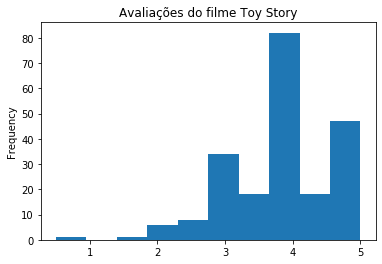

In [19]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

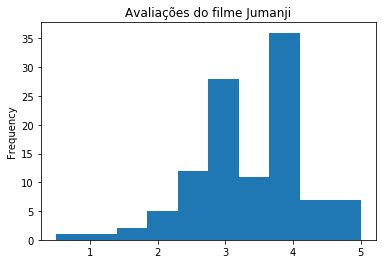

In [18]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Jumanji")

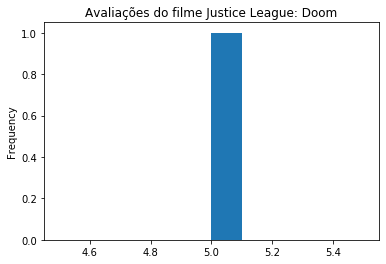

In [20]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

Agora que temos os gráficos, chegou a hora de analisar.

A primeira coisa que preciso saber é o que cada eixo do meu gráfico significa. Então, eixo x mostra a nota, enquanto eixo y a frequência das notas (quantas vezes determinada nota foi dada).

Entendido nosso gráfico, vamos contextualizar o cenário que estamos analisando:

Temos 3 filmes, dois muito populares (Toy story e Jumanji) e outro que nenhuma pessoa presente no momento da aula conhecia (animação da liga da justiça). O ponto que chamou a atenção, foi que a animação tinha média de nota maior que dois filmes, aparentemente mais popular, Jumaji e Toy Story. Será que a animação é um filme tão bom assim?
Dado esse cenário a primeira coisa que me chama a atenção é a animação da liga da justiça ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a quantidade de votos é um aspecto importante na avaliação das médias. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a distribuição das notas também é um fator importante na avaliação das médias.(Se ficar alguma dúvida sobre esse tema reveja o exemplo que o instrutor apresenta no final na aula)

Com isso nós fechamos a nossa primeira aula do #quarentenadados, viu quanta coisa aprendemos? Que tal colocar isso em prática?

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês.

Até a próxima aula!

### Desafio 1 - Determine quantos filmes não tem avaliações e quais são esses filmes.

In [21]:
#Verificando quais colunas possuem valores nulos/brancos
filmes_com_media.isna().sum()

filmeId     0
titulo      0
generos     0
nota       18
dtype: int64

In [22]:
#Localizando as 18 notas com NaN e quais são os filmes
filmes_com_media.query("nota != nota")

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


### Desafio 2 - Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [23]:
filmes_com_media.rename(columns={"nota": "nota_média"},inplace = True)

In [24]:
filmes_com_media.head()

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [25]:
filmes_com_media["generos"].isnull().value_counts()

False    9742
Name: generos, dtype: int64

### Desafio 3 - Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [26]:
#Criando a coluna count com as avaliações por filme
count = avaliacoes.groupby(["filmeId"])["filmeId"].count().reset_index(name="total_votos")
count.head()

,filmeId,total_votos
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [27]:
#Dando um merge nos dfs
filmes_final = filmes_com_media.merge(count, on="filmeId")

In [28]:
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


### Desafio 4 - Arredondar as médias (coluna de nota média) para duas casas decimais.

In [29]:
filmes_final = filmes_final.round({'nota_média': 2})

In [30]:
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


### Desafio 5 - Descobrir os generos dos filmes (quais são eles, únicos).

In [31]:
#Como temos mais de um genero por filme em alguns casos, precisamos quebrar essa coluna. 
#Primeiro um split na coluna para criar uma lista de generos
generos = filmes_final['generos'].str.split("|").tolist()

In [32]:
#O resultado é uma lista de listas, então precisamos retirar todos os itens de todas as listas.
lista_generos = []
for i in generos:
    lista_generos.extend(i)

In [33]:
#E set para retirar valores duplicados.
set(lista_generos)

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### Desafio 6 - Contar o número de aparições de cada gênero.

In [34]:
#Importando collections, que possui uma função que resolve esse desafio
from collections import Counter

In [35]:
dict_generos = Counter(lista_generos)

In [36]:
dict_generos

Counter({'Adventure': 1262,
         'Animation': 610,
         'Children': 664,
         'Comedy': 3753,
         'Fantasy': 778,
         'Romance': 1591,
         'Drama': 4349,
         'Action': 1828,
         'Crime': 1196,
         'Thriller': 1889,
         'Horror': 977,
         'Mystery': 573,
         'Sci-Fi': 980,
         'War': 381,
         'Musical': 333,
         'Documentary': 438,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 85,
         '(no genres listed)': 34})

### Desafio 7 - Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

In [37]:
#Passar o resultado do Counter para um formato que podemos usar no plot (dataframe)
df_generos = pd.DataFrame.from_dict(dict_generos, orient='index').reset_index()
df_generos.columns = ["genero", "quantidade"]

In [38]:
df_generos = df_generos.sort_values(by=['quantidade'],ascending=False).reset_index(drop=True)

In [39]:
df_generos

,genero,quantidade
0,Drama,4349
1,Comedy,3753
2,Thriller,1889
3,Action,1828
4,Romance,1591
5,Adventure,1262
6,Crime,1196
7,Sci-Fi,980
8,Horror,977
9,Fantasy,778


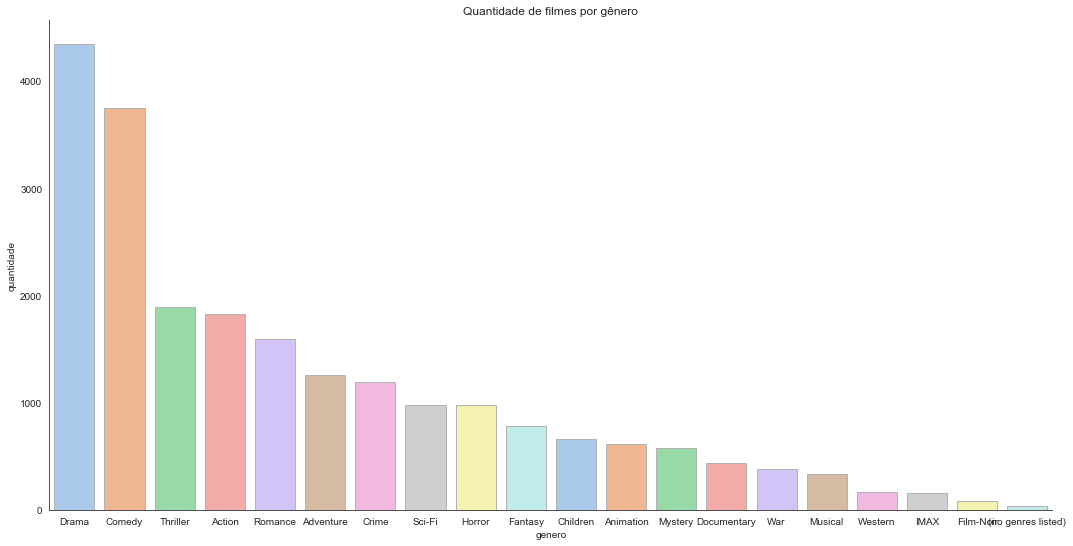

In [40]:
#Plot 
import seaborn as sns
sns.set_style("white")

sns.catplot(x="genero", y="quantidade", kind = "bar", data=df_generos,ci=None,palette='pastel',edgecolor='.7',height=7.5,aspect=2)
plt.title('Quantidade de filmes por gênero')
plt.show()

### Aula 2 - Analisando dados de filmes com mais profundidade

Nesta aula vamos estudar com mais profundidade as técnicas de centralidade, conhecer algumas boas práticas de visualização de dados e o famoso Boxplot.

Para inciar vamos precisar resolver alguns dos desafios deixados na aula 01 (Caso não tenha tentado resolver os desafios, recomendo tentar algumas vezes antes de olhar as repostas). Começando pelo exercício 05, onde precisamos segregar os gêneros de cada um dos filmes contidos na base de dados do Movie Lens.

Vamos relembrar como os dados estavam configurados.

In [102]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Temos os títulos e uma coluna com os respectivos gêneros, todos em uma única coluna, cada label é separada com um | (Adventure|Children|Fantasy) sendo do tipo string.

Para solucionar nosso problema precisamos separar cada um dos gêneros para então realizar a contagem. Existe várias formas de resolver este problema, por exemplo, desde métodos inputos das strings até as regex, mas como estamos usando o pandas já temos algo para facilitar nosso processamento dos dados.

Vamos aplicar o método e logo em seguida explicar a saída gerada.

In [103]:
filmes["generos"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Nossa, uma linha de código gerou essa tabelona cheia de linhas, colunas e números.

Como você percebeu a saída é um DataFrame, cada linha corresponde a respectiva linha da coluna gênero, cada coluna corresponde a um gênero (repare que cada gênero único virou uma coluna no DF). O que você deve estar se perguntando é como os valores 0/1 são preenchidos?.

Para explicar, vamos pegar os gêneros do filme Jumanji, Adventure|Children|Fantasy, na coluna dos repectivos gêneros (dataframe gerado por filmes["generos"].str.get_dummies('|')) o valor será 1, para todos os outros gêneros, que não são gêneros do filme Jumanji, vale 0. Em suma, se o nome da coluna pertence a algum gêreno do respectivo filme, o valor será 1 caso contrário 0 (Se ainda não ficou claro, pegue alguns filmes e confira os resultas na tabela anterior).

Até aqui resolvemos uma parte do problema, agora precisamo somar quantos 1 cada coluna tem.

In [104]:
filmes["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Ótimo, resolvemos o desafio e agora temos quantas vezes cada gênero aparece. Assim, fica fácil de reponder perguntar como, qual o gênero com mais filmes produzidos? Qual o menos? Qual o segundo? (Lembrando que o dado está restrito as informações do movie lens)

Se você tentou reponder, deve ter notado que não foi tão fácil assim, as informações não estão ordenadas e toda hora você precisa percorrer a tabela para fazer comparações. Nós podemos melhor isso ordenando as informações.

In [105]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Maravilha, agora tudo ficou mais fácil!

Conseguimos responder as perguntas anterior sem grandes dificuldades. Mas ainda podemos melhor mais a forma de expor nossa informação, não acha?

Que tal uma imagem para visualizar? (Desafio 07 da aula 01)

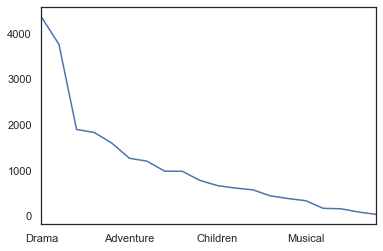

In [106]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

Iniciamos com o plot padrão do pandas, e como percebemos não adianta só plotar uma imagem, é preciso que faça sentido para a informação que queremos analisar, um gráfico de linhas não está fazendo muito sentido!

Temos um gráfico muito conhecido que sempre encontramos por aí, o famoso gráfico de pizza ou torta.

Já que ele é tão famoso talvez seja uma boa ideia tentar!

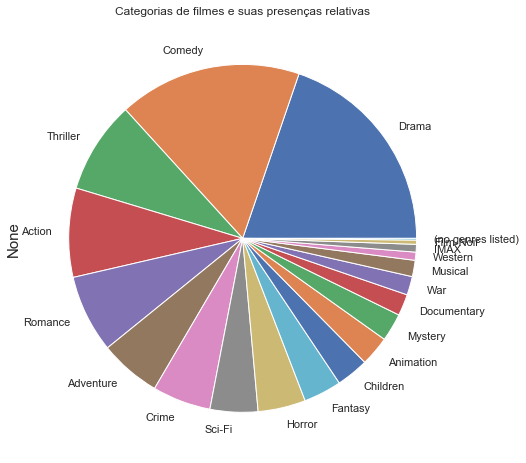

In [107]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

E aí o que você achou?

Algo que fica evidente neste gráfico é que Drama, Comedy, Thriller, e Action tem proporções "grandes", mas qualquer outra análise fica complicada.

Primeiro, as cores começa a se repetir e isso não é o ideial.

Segundo, repare nos gêneros com menos filmes,consegue tirar alguma informação de lá? é muito difícil de analisar.

Quarto, vamos tentar comparar thriller e Action, qual está presente em mais filmes? Difícil responder, quando estamos trabalhando com gráficos tipo esse fazemos comparações entre área, não somos bons nisso.

Por fim, o importante de uma visualização é que ela seja "transparente" ao intuíto de nossa análise. Ou seja, estamos querendo analisar as informações de quantidade, comparando as labels de forma geral e evidênciando de maneira clara as diferenças entre elas (proporções).

Portanto, o gráfico de pizza não torna as comparações claras, sendo assim uma má ideia.

Vamos construir juntos uma solução mais adequada!

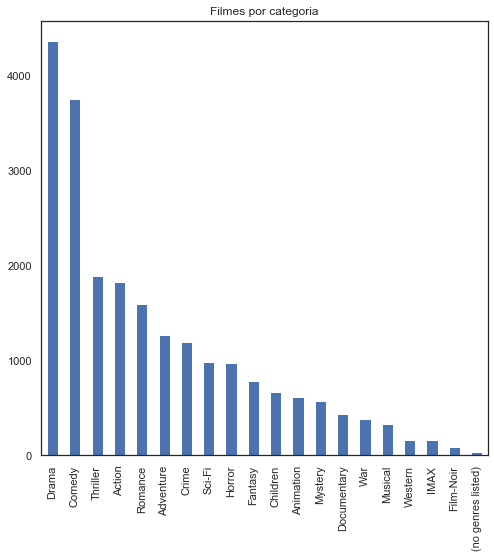

In [108]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

Mudamos da pizza para a barra, alterando apenas o parâmetro kind do método.

Veja como o gráfico de barra torna a análise mais simples, logo de cara a diferença entre Drama e Comedy, comparado aos demais gêneros fica evidênte. No gráfico de pizza era super difícil comparar Thriller e Action, agora a comparação ficou fácil e conseguimos perceber o quão perto estão uma da outra.

A interpretação dos dados melhorou muito com essa visualização, mas podemos melhorar ainda mais. O que queremos é tornar evidênte os gêneros que tem a maior participação nos filmes em geral, ou seja transparecer através da imagem uma visão geral de proporcionalidade. Para tprnar evidênte essa informação vamos utilizar algo "semelhante" a um mapa de calor.

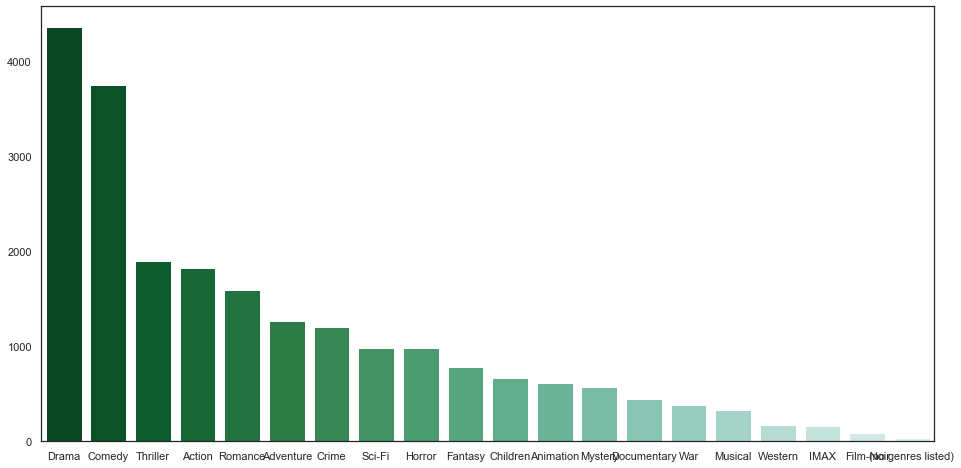

In [109]:
import seaborn as sns
sns.set_style("white")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Já, já explicamos o que foi feito em toda imagem, por agora repare como a imagem passa muito mais informação. Conseguimos comparar de forma fácil entre os gêneros e através do mapa de calor (gêneros com maior número tem um verde muito mais forte, gêneros com menor número é praticamente transparente) evidênciamos quais são as labels com maior participação, médias e insignificantes. Toda essa informação em uma única imagem!

Bom, agora vamos entender como foi o código.

Primeiro, não plotamos mais a imagem com o .plot() do pandas, vamos precisar de uma biblioteca de visualização mais poderosa para configurar nossa imagem, utilizamos o seaborn.

Segundo, chamamos o barplot do seaborn, adicionando uma paleta de cores com efeito de mapa de calor (parâmetro pallette), no parâmetro n_color de sns.color_palette() adicionamos +4 para que a última barra não seja totalmente transparente.

Terceiro, também adicionamos o sns.set_style("whitegrid") para que todos os gráficos tenham a linha de grade do eixo X evidênte, facilitando a comparação entre as barras.

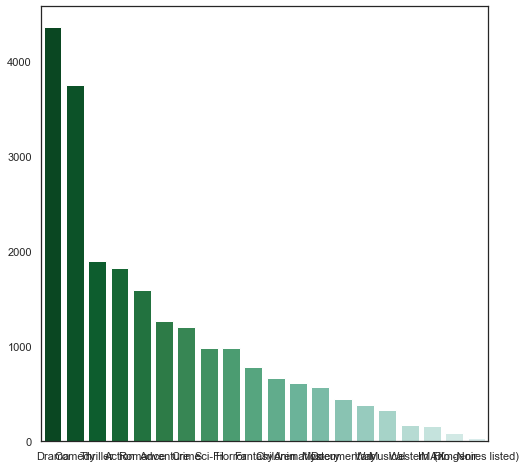

In [110]:
sns.set_style("white")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Por fim, mudamos o tamanho da imagem com o figsize do métodoplt.figure(). Assim, temos um gráfico com muitas informações e agradável de analisar.

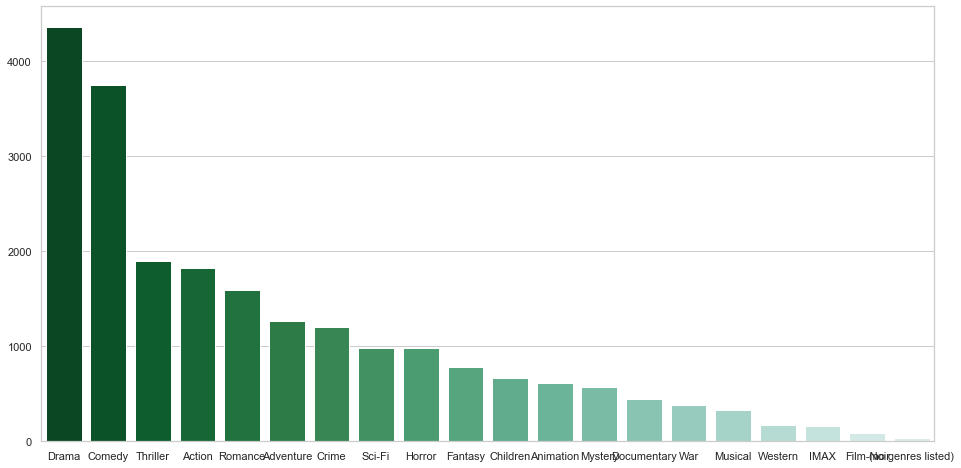

In [111]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Conseguimos analisar e tirar diversas conclusões trabalhando com a visualização dos gêneros. Será que conseguimos utilizar visualizações para entender melhor as notas de um filme?

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas.

Na aula 01 calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [112]:
filmes_com_media.head()

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das ntoas para comparar alguns filmes. Por exemplo, Toy Story e Jumanji

3.9209302325581397


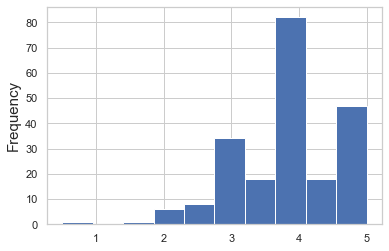

In [113]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


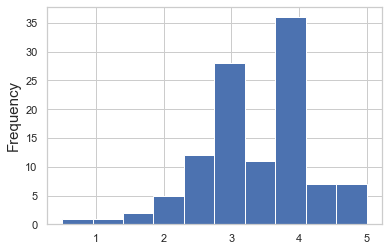

In [114]:
notas_do_filme_1 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados.

Lembra o exemplo que o Guilherme Silveira deu em aula comparando os sálarios de uma cidade? Olhando apenas para as médias dos salários não conseguimos evidênciar a desigualdade que havia entre as cidades.

In [115]:
# Cidada A
populacao = 1000
salario = 1100
 
media = 1100
 
# Cidade B
populacao = 1000
salario1 = 1000000
salario999 = 100
 
media = (salario1 * 1 + salario999 * 999) / 1000
media = 1099.00

P.S: Se tiver dúvidas reveja essa parte da aula e tente enteder o problema da média.

Outras métrica que pode nos ajudar a interpretar melhor os dados são os quatis, principalmente a mediana

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.

In [41]:
#Analisando filmes com médias aproximadas, olhar apenas as médias pode ser um problema
filmes_final.sort_values("nota_média", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota_média,total_votos
8747,128620,Victoria (2015),Crime|Drama|Romance,3.90,5
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.90,48
5467,26258,"Topo, El (1970)",Fantasy|Western,3.90,5
4786,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,3.90,62
5439,26084,"Music Man, The (1962)",Children|Comedy|Musical|Romance,3.90,5
3012,4034,Traffic (2000),Crime|Drama|Thriller,3.90,70
4094,5876,"Quiet American, The (2002)",Drama|Thriller|War,3.90,5
2890,3871,Shane (1953),Drama|Western,3.90,5
6563,55247,Into the Wild (2007),Action|Adventure|Drama,3.90,41
2155,2871,Deliverance (1972),Adventure|Drama|Thriller,3.90,30


Bom, ordenando os filmes pela nota médias e fatiando os dados entre 2450 e 2500, temos uma região onde as médias são semelhates e provavelmente não tem apenas um único voto. Vamos comparar o fime Wizard of Oz, filmeId=919 e *Little Miss Sunshine filmeId=46578.

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar nossa primeira função, assim passamos apenas o FilmeId e temos as informações desejadas.

In [42]:
#Função para trazer plot do filme
def plot_filme(n):
    notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
    notas_do_filme.plot(kind='hist')
    return notas_do_filme.describe()

Definimos nossa função plot em python e repare que estamos usando F-string para fazer a interpolação dos dados, se tiver tiver dúvida veja essa explicação no fórum da alura.

Agora precisamos chamar a função!

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

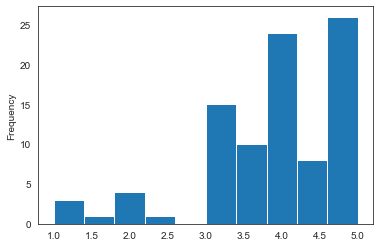

In [43]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

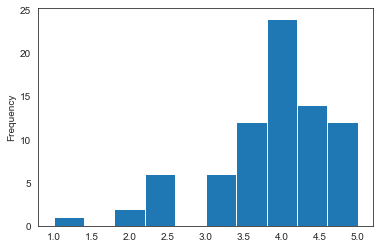

In [44]:
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam Wizard of Oz (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1). Quando comparamos com a histograma temos um do Little mis sunshine, percebemos que os resultados se concentra entre valores medianos(notas 2.5-4).

O que confirma nossa análise aqui é comparar os 25% 50% e 75%. 50% é o valor da mediana, e ambos filmes tem mesma mediana, mas 25% e 75% são diferentes. Se você lembra lá da estatísitca esses são os 1° 2° e 3° quartis.

Olha, mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor, o gráfico que nos ajuda neste caso é o Boxplot. Vamos adaptar nossa função para conseguir plotar o boxplot e interpretá-lo.

In [45]:
#Otimizando a função de plot, para trazer também um boxplot e termos mais informações estatísticas

def plot_filme(n):
    notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
    notas_do_filme.plot(kind='hist')
    plt.show()
    print('\n')
    notas_do_filme.plot.box()
    plt.show()
    return notas_do_filme.describe()

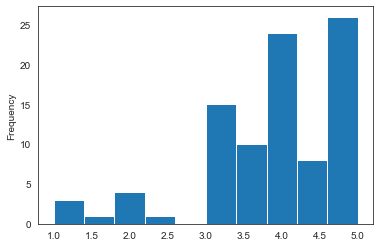

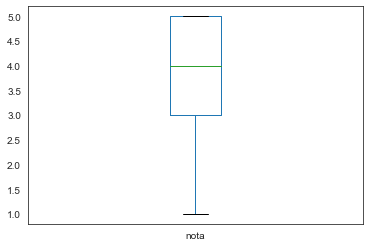

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [46]:
plot_filme(919)

E aí, viu como é simples criar criar um boxplot com o pandas?

Apenas chamamos o método .plot.box(), agora o que precisamos fazer é interpretar este gráfico.

Vamos focar primeiro na "caixa" a linha verde que divide a caixa em dois é a mediana (compare com as estatísticas geradas pelo discribe()), a parte superior da caixa é o 3° Quartil (75%) e a parte inferior é o 1° Quartil (25%).

Agora repare nos limites inferior e superior, represetados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superir e inferior são calculados e dependem de Q1 e Q3. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.

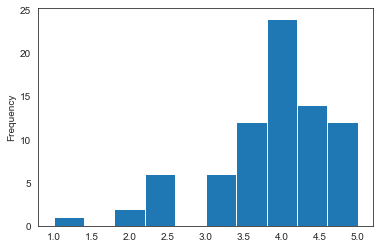

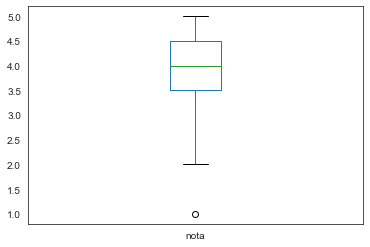

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [47]:
plot_filme(46578)

Olha que legal, diferente do primeiro boxplot, neste os limites superiores não se sobrepõe e temos uma informação a mais, no caso temos essa bolinha localizada em y=1. A "bolinha" chamamos de valor discrepante, por ir além dos limites inferior e superior (chamamos na aula de outliers, existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

Não vamos entrar em todos os detalhes do boxplot mas recomendo a explicação do wikipedia, ela é muito completa, cheias de exemplo e imagens para facilitar o entendimento.

Agora comparando os boxplot dos dois filmes deixa muito mais evidente as diferenças entre elas, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto. Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas, vamos juntas vários boxplot em uma imagem só. Veja como podemos fazer isso usando o seaborn, para aprendermos outra forma de plotar boxplot!

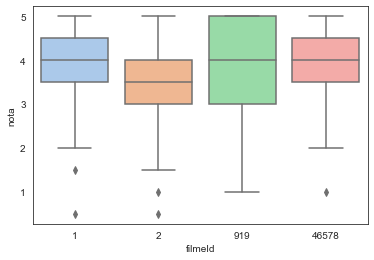

In [48]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota",palette='pastel')

Chamamos o sns.boxplot() passando três parâmetros. Parâmetro dados é um dataframe das notas dos filmes com Toy Story, Jumanji, Wizard of Oz e Little miss sunshine (usamos o .query() para selecionar os dados), x é o Id do filme e y as respectivas notas. Agora conseguimos comparar as notas dos filmes de forma muito mais claram tente realiza a análise aí na sua casa!

Com isso nós fechamos nossa segunda aula do #quarentenadados, viu quanta coisa aprendemos? Que tal colocar isso em prática?

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês.

Até a próxima aula!

### Desafio 1 - Rotacionar os thicks (os nomes dos generos) do gráfico de barras  (o último), de forma a deixar as legendas mais legíveis.

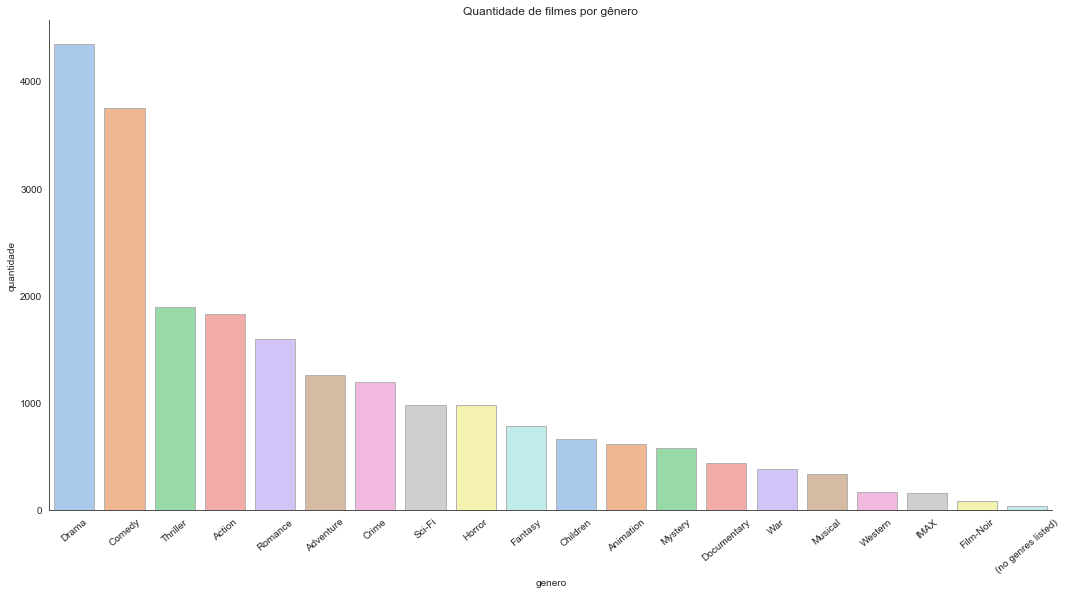

In [49]:
chart = sns.catplot(x="genero", y="quantidade", kind = "bar", data=df_generos,ci=None,palette='pastel',edgecolor='.7',height=7.5,aspect=2)
chart.set_xticklabels(rotation=40)
plt.title('Quantidade de filmes por gênero')
plt.show()

### Desafio 2 - Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [50]:
filmes_final.sort_values("nota_média", ascending=False)[2401:2408]

,filmeId,titulo,generos,nota_média,total_votos
4755,7090,Hero (Ying xiong) (2002),Action|Adventure|Drama,3.92,38
6534,54881,"King of Kong, The (2007)",Documentary,3.92,12
8081,100383,Side Effects (2013),Crime|Drama|Mystery|Thriller,3.92,6
7966,96728,"Master, The (2012)",Drama,3.92,6
4153,5989,Catch Me If You Can (2002),Crime|Drama,3.92,115
3123,4210,Manhunter (1986),Action|Crime|Drama|Horror|Thriller,3.92,6
2941,3949,Requiem for a Dream (2000),Drama,3.92,96


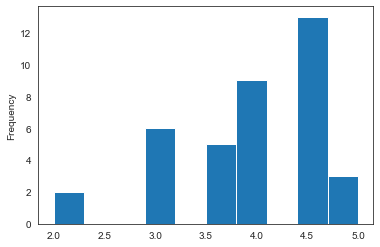

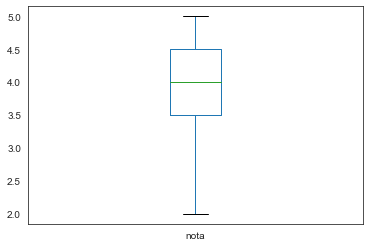

count    38.000000
mean      3.921053
std       0.758076
min       2.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [51]:
plot_filme(7090)

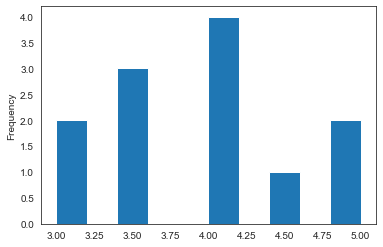

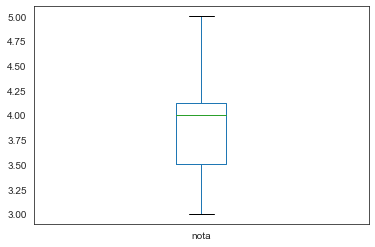

count    12.000000
mean      3.916667
std       0.668558
min       3.000000
25%       3.500000
50%       4.000000
75%       4.125000
max       5.000000
Name: nota, dtype: float64

In [52]:
plot_filme(54881)

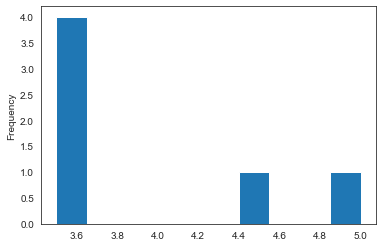

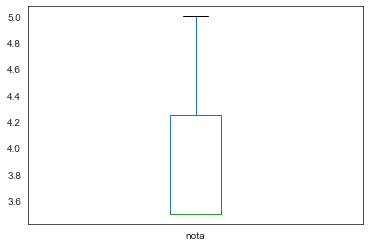

count    6.000000
mean     3.916667
std      0.664580
min      3.500000
25%      3.500000
50%      3.500000
75%      4.250000
max      5.000000
Name: nota, dtype: float64

In [53]:
plot_filme(100383)

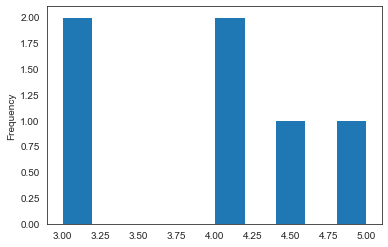

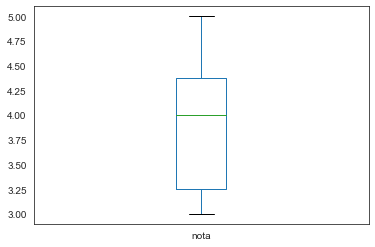

count    6.000000
mean     3.916667
std      0.801041
min      3.000000
25%      3.250000
50%      4.000000
75%      4.375000
max      5.000000
Name: nota, dtype: float64

In [54]:
plot_filme(96728)

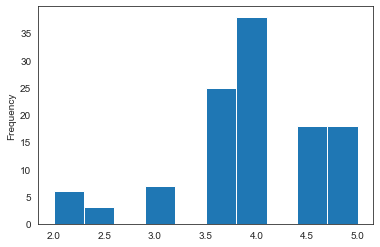

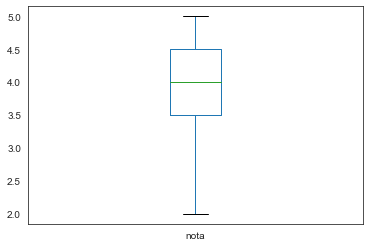

count    115.000000
mean       3.921739
std        0.759707
min        2.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [55]:
plot_filme(5989)

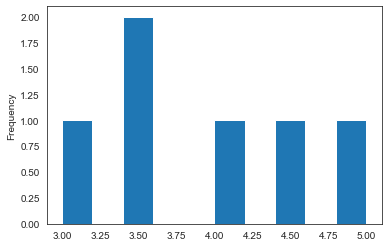

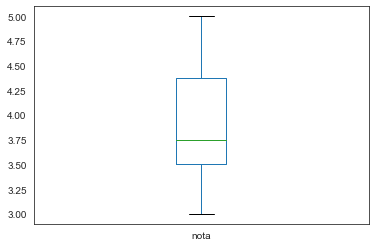

count    6.000000
mean     3.916667
std      0.735980
min      3.000000
25%      3.500000
50%      3.750000
75%      4.375000
max      5.000000
Name: nota, dtype: float64

In [56]:
plot_filme(4210)

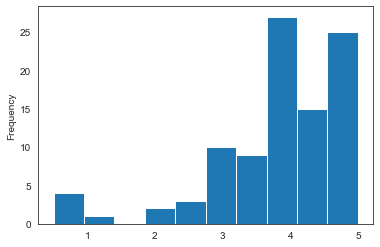

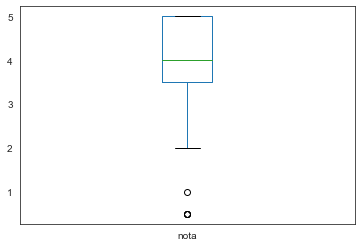

count    96.000000
mean      3.921875
std       1.091421
min       0.500000
25%       3.500000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [57]:
plot_filme(3949)

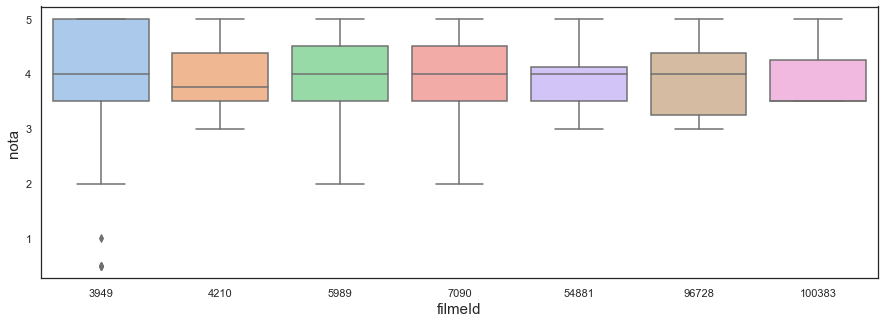

In [85]:
plt.figure(figsize=(15, 5))
sns.set_style("white")
sns.boxplot(data = avaliacoes.query("filmeId in [7090,54881,100383,96728,5989,4210,3949]"), x ="filmeId", y="nota",palette='pastel')

### Desafio 3 - Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!)

In [59]:
top10_votos = filmes_final.sort_values("total_votos", ascending=False).head(10).reset_index(drop=True)

In [60]:
top10_votos

,filmeId,titulo,generos,nota_média,total_votos
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251
6,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238
7,110,Braveheart (1995),Action|Drama|War,4.03,237
8,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224
9,527,Schindler's List (1993),Drama|War,4.22,220


<Figure size 1080x360 with 0 Axes>

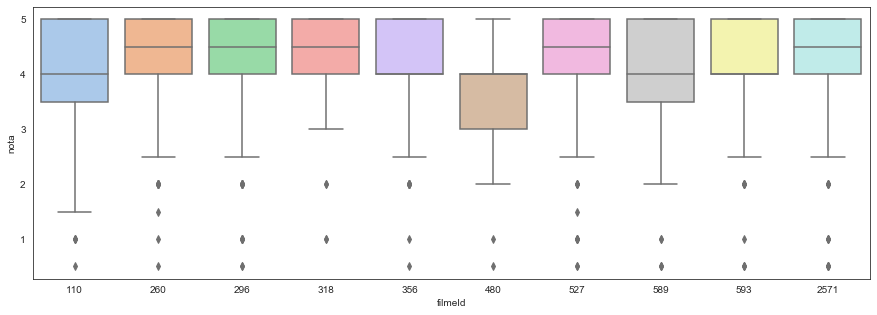

In [61]:
plt.figure(figsize=(15, 5))
sns.set_style("white")
sns.boxplot(data = avaliacoes.query("filmeId in [356,318,296,593,2571,260,480,110,589,527]"), x ="filmeId", y="nota",palette='pastel')

 - Apenas um dos filmes não é da década de 90 (Star Wars: Episode IV - A New Hope (1977))

### Desafio 4 - Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [62]:
data = avaliacoes.query("filmeId in [1,2,919,46578]")

In [63]:
data = data.merge(filmes, on="filmeId",how='left')

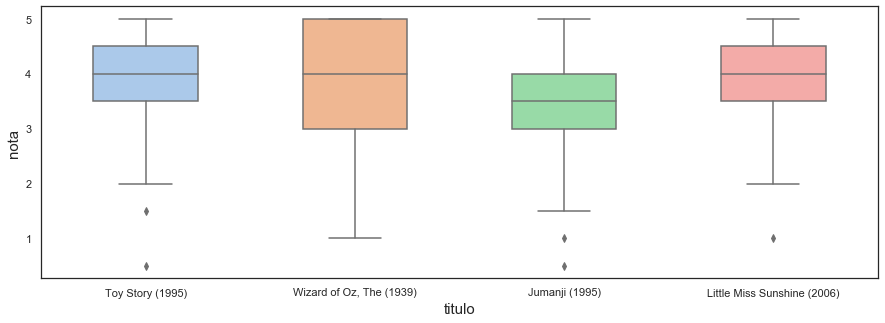

In [98]:
plt.figure(figsize=(15, 5))
sns.set_style("white")
sns.boxplot(data = data, x ="titulo", y="nota",palette='pastel',width=0.5)
plt.show()

### Desafio 5 - Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [65]:
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


In [66]:
notas_medianas_por_filme = avaliacoes.groupby("filmeId")["nota"].median()
filmes_final = filmes_final.join(notas_medianas_por_filme, on="filmeId")
filmes_final.rename(columns={"nota": "nota_mediana"},inplace = True)
filmes_final = filmes_final.round({'nota_mediana': 2})
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos,nota_mediana
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49,3.0


In [67]:
notas_moda_por_filme = avaliacoes.groupby("filmeId")["nota"].agg(lambda x: x.mode()[0])
filmes_final = filmes_final.join(notas_moda_por_filme, on="filmeId")
filmes_final.rename(columns={"nota": "nota_moda"},inplace = True)
filmes_final = filmes_final.round({'nota_moda': 2})
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos,nota_mediana,nota_moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215,4.0,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110,3.5,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52,3.0,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7,3.0,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49,3.0,3.0


### Desafio 7 - Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [80]:
#Primeiramente, ajustar o formato da coluna de data no df de avaliações
type(avaliacoes['dataregistro'][0])

numpy.int64

In [81]:
avaliacoes['dataregistro'] = pd.to_datetime(avaliacoes['dataregistro'], unit='s')

In [82]:
avaliacoes.head()

,usuarioId,filmeId,nota,dataregistro
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [83]:
#Criar df trazendo a média das notas por ano
media_anual = avaliacoes.groupby(avaliacoes['dataregistro'].dt.year)['nota'].agg(['mean']).reset_index()
media_anual = media_anual.round({'mean': 2})
media_anual.head()

,dataregistro,mean
0,1996,3.54
1,1997,3.73
2,1998,3.44
3,1999,3.77
4,2000,3.39


<Figure size 1080x360 with 0 Axes>

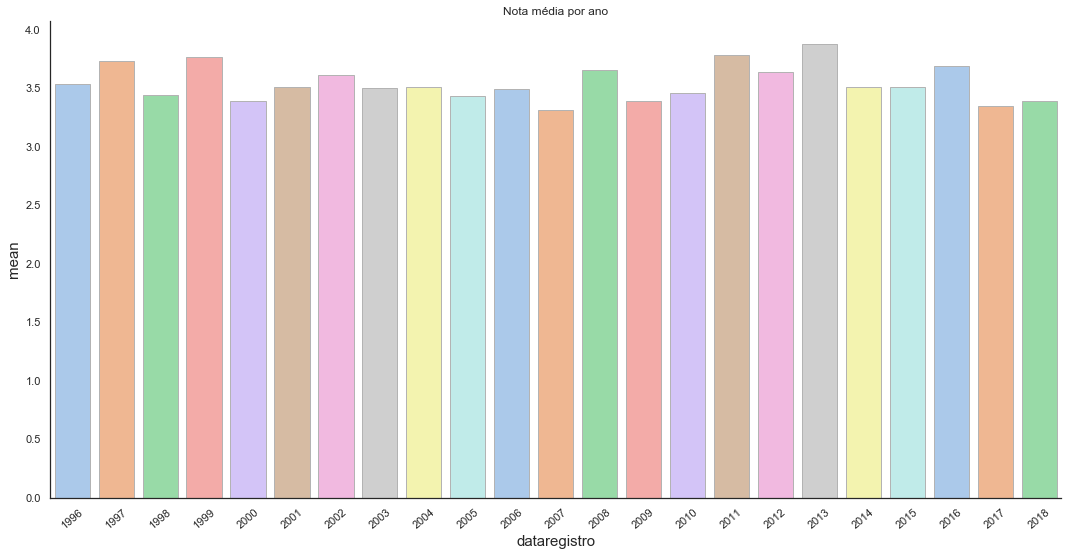

In [84]:
#Plotar a info
sns.set_style("white")
plt.figure(figsize=(15, 5))
chart = sns.catplot(x="dataregistro", y="mean", kind = "bar", data=media_anual,ci=None,palette='pastel',edgecolor='.7',height=7.5,aspect=2)
chart.set_xticklabels(rotation=40)
plt.title('Nota média por ano')
plt.show()